# ЛАБОРАТОРНА РОБОТА  

## "Алгоритми та моделі перетворення даних"

__Метою__ лабораторної роботи є набуття практичних навичок використання модулів бібліотеки `Scikit-learn` для вирішення наступних задач:

- визначення та розподілення данних по їх типам
- вибір та застосування алгоритмів перетворення різноманітних типів даних
- настроювання параметрів та застосування трансформерів
- побудова конвеєра для автоматизації процесів трансформації даних

__Результатом__ виконання лабораторної роботи повинен стати датасет, в якому колонки з покажчиком перетворені під для навчання моделей

In [1]:
# імпортувати бібліотеки pandas та numpy
import pandas as pd
import numpy as np

## Завдання

Вхідним датасетом є csv-файл, отриманий в результаті виконання лабораторної роботи по конструюванню та очищеню покажчиків даних про продажі квартир рієлторської компанії.

<h4 style='background-color:cyan; color:red; padding:15px'><ul>
    <li>замість `...` вписуйте Ваш програмний код
    <li>не змінюйте імена запропонованих зміних
    </ul>
</h4>

In [2]:
# ззчитати підготовлений датасет `apartments_clean.csv` в датафрейм та проінспектувати його стан
data = pd.read_csv("apatrments_clean.csv")
data.head()

,Price,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,area_comfort
0,140000.0,2.0,2258.0,7.0,9.0,1969.0,62.0,47.0,9.0,Омеляновича-Павленка,6.0
1,105000.0,4.0,847.0,25.0,26.0,2018.0,124.0,71.0,16.0,Омеляновича-Павленка,37.0
2,175000.0,3.0,1786.0,25.0,26.0,2010.0,98.0,37.0,14.0,Ованеса Туманяна,47.0
3,30970.0,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,10.0
4,82000.0,2.0,1281.0,18.0,26.0,2009.0,64.0,37.0,14.0,Дніпровська,13.0


## 1. Визначення типів покажчиків вхідного датасету

In [3]:
# відокремити від робочого датасету колонку з цільовим показчиком (`Price`) 
# та вилучити її з обробки
target = data["Price"]
data.drop("Price", axis=1, inplace=True)
data

,rooms,price_per_m2,level,levels,year,area_total,area_living,area_kitchen,street,area_comfort
0,2.0,2258.0,7.0,9.0,1969.0,62.0,47.0,9.0,Омеляновича-Павленка,6.0
1,4.0,847.0,25.0,26.0,2018.0,124.0,71.0,16.0,Омеляновича-Павленка,37.0
2,3.0,1786.0,25.0,26.0,2010.0,98.0,37.0,14.0,Ованеса Туманяна,47.0
3,1.0,1106.0,12.0,13.0,2013.0,28.0,13.0,5.0,Петропавлівська,10.0
4,2.0,1281.0,18.0,26.0,2009.0,64.0,37.0,14.0,Дніпровська,13.0
...,...,...,...,...,...,...,...,...,...,...
671,2.0,2256.0,6.0,9.0,2009.0,82.0,35.0,24.0,Перемоги,23.0
672,3.0,757.0,8.0,9.0,1976.0,66.0,45.0,8.0,Наумова,13.0
673,1.0,2342.0,7.0,15.0,2009.0,38.0,20.0,7.0,Перемоги,11.0
674,2.0,2656.0,5.0,7.0,1948.0,64.0,37.0,9.0,Велика Васильківська,18.0


In [4]:
# для самоперевірки: кількисть рядків в датасетах повинна співпадати!
target.shape, data.shape

((676,), (676, 10))

In [16]:
# імпортувати з sklearn модуль, що відповідає за селективний відбір покажчиків
from sklearn.compose import make_column_selector

In [19]:
# побудувати  селектори для вібіру числових та категоріальних колонок
numeric_selector = make_column_selector(dtype_include=np.number)
category_selector = make_column_selector(dtype_include=object)

In [20]:
# застосувати побудовані селектори для створення списків числових та категоріальних показчиків
numeric_data_columns = numeric_selector(data)
category_data_columns = category_selector(data)

print(f'список числових покажчиків = {numeric_data_columns}')
print(f'список категоріальних покажчиків = {category_data_columns}')

список числових покажчиків = ['rooms', 'price_per_m2', 'level', 'levels', 'year', 'area_total', 'area_living', 'area_kitchen', 'area_comfort']
список категоріальних покажчиків = ['street']


In [22]:
# створити 2 окремі датасети: числовий та категоріальний та вивести їх основні властивості
data_numeric = data.loc[:, numeric_selector(data)]
data_category = data.loc[:, category_selector(data)]

data_numeric.shape, data_category.shape

((676, 9), (676, 1))

## 2. Маштабування числових та категоріальних колонок

### 2.1. Маштабування числових показчиків

In [31]:
# з модуля `preprocessing` імпортувати нормалізатор 'MinMaxScaler' та стандартизатор 'StandardScaler'
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [38]:
# створити відповідні маштабувачі
standart_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [42]:
# побудувати змаштабовані датасети за двома стратегіями: стандартизація та нормалізація
data_normalized = min_max_scaler.fit_transform(data_numeric)
data_standardized = standart_scaler.fit_transform(data_numeric)


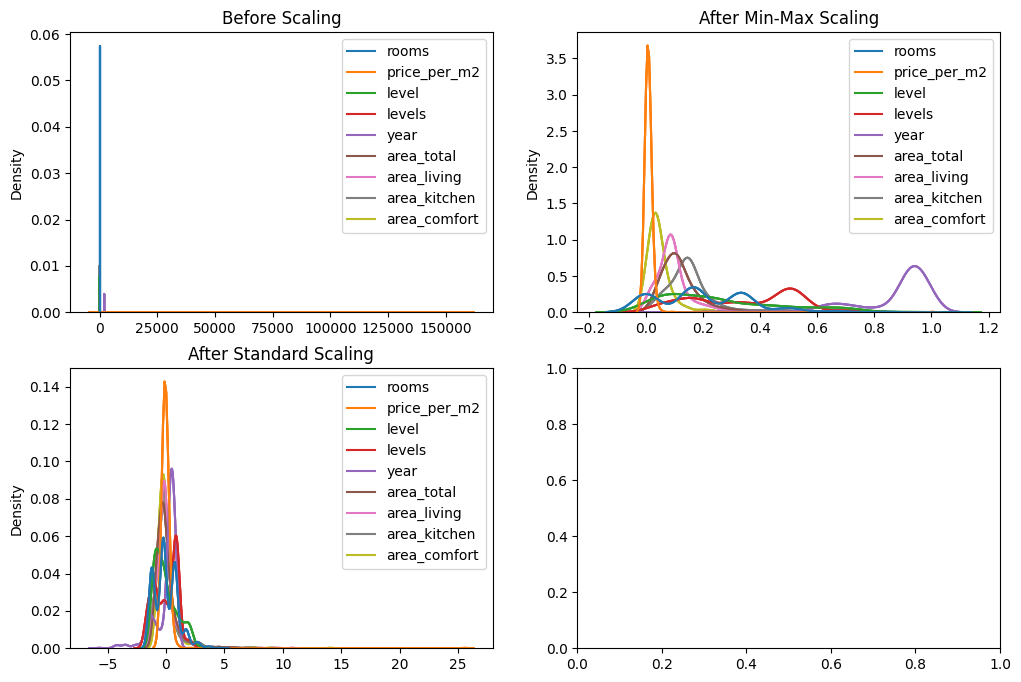

In [46]:
# побудувати графіки розподілення значень показчиків при
# стандартном та нормалізованом маштабуванні
df_normalized = pd.DataFrame(data_normalized, columns=data_numeric.columns)
df_standardized = pd.DataFrame(data_standardized, columns=data_numeric.columns)

# створити графіки
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes[0, 0].set_title('Before Scaling')
sns.kdeplot(data_numeric, ax=axes[0, 0])
sns.kdeplot(data_numeric, ax=axes[0, 0])
sns.kdeplot(data_numeric, ax=axes[0, 0])

axes[0, 1].set_title('After Min-Max Scaling')
sns.kdeplot(df_normalized, ax=axes[0, 1])
sns.kdeplot(df_normalized, ax=axes[0, 1])
sns.kdeplot(df_normalized, ax=axes[0, 1])

axes[1, 0].set_title('After Standard Scaling')
sns.kdeplot(df_standardized, ax=axes[1, 0])
sns.kdeplot(df_standardized, ax=axes[1, 0])
sns.kdeplot(df_standardized, ax=axes[1, 0])

plt.show()

#####  __проаналізувати графіки та визначись який маштабувач краще підходить до числовї підмножини робочого датасету__

### 2.1. Маштабування категоріальних показчиків

In [ ]:
# з модуля `preporcessing` імпортувати кодувальники 'OrdinalEncoder' та 'OneHotEncoder'
...

In [ ]:
# проаналізувати категоріальні показчики та визначитись до якого показчика
# який енкодер доцільно застосовувати
...

In [ ]:
# створити енкодери та закодувати ними відповідні категоріальні колонки
ordinal_encoder = ...
one_hot_encoder = ...

## 3. Побудова трансформера для підготовки даних

In [ ]:
# з модуля `compose` імпортувати трансформер колонок `ColumnTransformer`
...

In [ ]:
# побудувати трансформер для предобробки числових та категоріальних показчиків
# робочого датасету
transformer = ...
print(transformer)

In [ ]:
# отримати вихідний масив застосував трансфомер до вхідного датасуту
data_transformed = ...
data_transformed.shape

In [ ]:
# побудувати вихідний датафрейм з вихідного масиву додавши в першу колонку
# ціловий показчик `target`
apartment_transformed = ...

In [ ]:
# Проінспектувати вихідний датасет `apartment_transformed`
...

In [ ]:
# зберегти підготовлений датасет в csv-файлі `apartment_transformed.csv`
...